In [1]:
%load_ext autoreload

In [2]:
import torch
device = torch.device("cuda")

# replace with shorten factor and dimension of choice
from cheap.pretrained import CHEAP_shorten_2_dim_1024
pipeline = CHEAP_shorten_2_dim_1024(return_pipeline=True)

# sample sequences
# note: returned representation will be padded to the length of the longest sequence
# consider cropping the sequences beforehand if memory is an issue.

# sequences = [
#     # >cath|current|12asA00/4-330
#     "AYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQDNLSGAEKAVQVKVKALPDAQFEVVHSLAKWKRQTLGQHDFSAGEGLYTHMKALRPDEDRLSPLHSVYVDQWDWERVMGDGERQFSTLKSTVEAIWAGIKATEAAVSEEFGLAPFLPDQIHFVHSQELLSRYPDLDAKGRERAIAKDLGAVFLVGIGGKLSDGHRHDVRAPDYDDWSTPSELGHAGLNGDILVWNPVLEDAFELSSMGIRVDADTLKHQLALTGDEDRLELEWHQALLRGEMPQTIGGGIGQSRLTMLLLQLPHIGQVQAGVWPAAV",
#     # >cath|current|132lA00/2-129
#     "VFGRCELAAAMRHGLDNYRGYSLGNWVCAAFESNFNTQATNRNTDGSTDYGILQINSRWWCNDGRTPGSRNLCNIPCSALLSSDITASVNCAKIVSDGNGMNAWVAWRNRCGTDVQAWIRGCRL",
#     # >cath|current|153lA00/1-185
#     "RTDCYGNVNRIDTTGASCKTAKPEGLSYCGVSASKKIAERDLQAMDRYKTIIKKVGEKLCVEPAVIAGIISRESHAGKVLKNGWGDRGNGFGLMQVDKRSHKPQGTWNGEVHITQGTTILINFIKTIQKKFPSWTKDQQLKGGISAYNAGAGNVRSYARMDIGTTHDDYANDVVARAQYYKQHGY",
# ]

# emb, mask = pipeline(sequences)

Using tanh layer at bottleneck...
Finished loading HPCT model with shorten factor 2 and 1024 channel dimensions.
Creating ESMFold embedding only model...
ESMFold embedding only model created in 30.39 seconds


In [3]:
sequences = [
    "MVPGVRIIPSLLGLVMFWLPLDSQARSRSGKVCLFGEKIYTPGQSWHPYLEPQGTIYCVRCTCSENGHVNCYRLRCPPLHCSQPVMEPQQCCPRCVDPHVPSGLRVPLKSCQLNETTYQHGEIFSAQELFPARLSNQCVLCSCIEGHTYCGLMTCPEPSCPTTLPLPDSCCQTCKDRTTESSTEENLTQLQHGERHSQDPCSERRGPSTPAPTSLSSPLGFIPRHFQSVGMGSTTIKIILKEKHKKACTHNGKTYSHGEVWHPTVLSFGPMPCILCTCIDGYQDCHRVTCPTQYPCSQPKKVAGKCCKICPEDEAEDDHSEVISTRCPKVPGQFHVYTLASPSPDSLHRFVLEHEASDQVEMYIWKLVKGIYHLVQIKRVRKQDFQKEAQNFRLLTGTHEGYWTVFLAQTPELKVTASPDKVTKTL",
]

In [4]:
emb, mask = pipeline(sequences)

<Axes: >

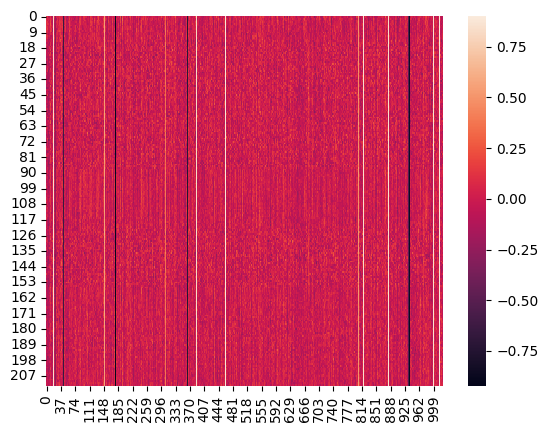

In [5]:
import seaborn as sns
sns.heatmap(emb.detach().cpu()[0])

In [7]:
from cheap.utils import LatentScaler
scaler = LatentScaler()
x = scaler.unscale(emb)

<Axes: >

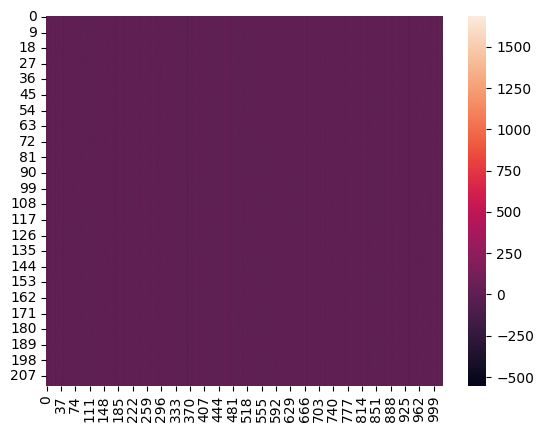

In [8]:
sns.heatmap(x[0].detach().cpu())

In [9]:
from cheap.proteins import LatentToSequence, LatentToStructure

In [13]:
to_seq = LatentToSequence()
seqs = to_seq.to_sequence(x)

In [11]:
seqs[2]

['RDADTGDEDGGEEEDDRIDTDDDDEDEDTEERGARDDETGGDSSREDDHDGHGESDDHSDDDETFWGDRTDIHDTETEETTEIDHESDDDDDREEDDADDDHEDEDNGDDEDGEDDTEEDEEEEDEDDIRADGIETETEEEDDGSDTDDEDIDDDEEGDDDDERDDDHTGRTDDSEDGHDGDDEEGTTTEDEHEDDRHTDEDDGESDDDDHEE']

In [14]:
# to_struct = LatentToStructure()
out = to_struct.to_structure(x, seqs[2])

Creating ESMFold...
ESMFold model loaded in 33.56 seconds.


In [41]:
# with open("/homefs/home/lux70/code/hackathon/cheap.pdb", "w") as f:
#     f.write(out[0][0])

In [17]:
pdbstr = out[0][0]
import py3Dmol

view = py3Dmol.view(width=400, height=300)
view.addModelsAsFrames(pdbstr)
view.setStyle({"model": -1}, {"cartoon": {"color": "green"}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [15]:
from plaid.esmfold import esmfold_v1

esmfold = esmfold_v1()

Creating ESMFold...
ESMFold model loaded in 33.78 seconds.


In [16]:
output = esmfold.infer_pdbs(sequences)

In [17]:
path = "/homefs/home/lux70/code/hackathon/raygun.fasta"
from plaid.utils import read_sequences_from_fasta

sequences = read_sequences_from_fasta(path)

In [18]:
from Bio import SeqIO
record = SeqIO.parse(path, "fasta")

In [19]:
from Bio import SeqIO

# Convert to list of sequence strings
sequences = [str(record.seq) for record in SeqIO.parse(path, "fasta")]

# If you want both IDs and sequences
seqs_with_ids = [(record.id, str(record.seq)) for record in SeqIO.parse(path, "fasta")]

# If you need a dictionary with ID as key and sequence as value
seq_dict = {record.id: str(record.seq) for record in SeqIO.parse(path, "fasta")}

In [20]:
sequences = list(seq_dict.values())

In [10]:
emb, masks = pipeline(sequences)

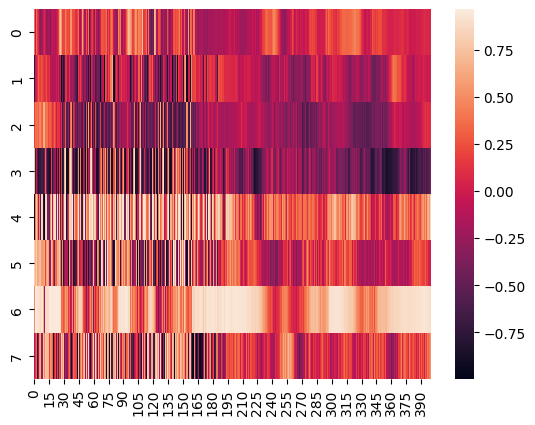

In [12]:
# for i in range(len(sequences)):
x = emb.mean(dim=0)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.heatmap(x.detach().cpu().T, ax=ax)
plt.show()
